<a href="https://colab.research.google.com/github/prashanth-acsq/Colab-Notebooks/blob/main/Diabetes-1-Comprehensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Setup**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


PATH = "/content/gdrive/My Drive/Datasets/diabetes.csv"


def breaker(num: int=50, char: str="*") -> None:
    print("\n" + num*char + "\n")

Mounted at /content/gdrive


### **Library Imports**

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import random as r
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier 
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report

### **Env Setup**

In [3]:
SEED = 42
N_SPLITS = 5
sc_X = StandardScaler()

if not os.path.exists("/content/logs"): os.makedirs("/content/logs")
if not os.path.exists("/content/models"): os.makedirs("/content/models")

LOG_FILE = "/content/logs/training_logs.txt"
with open(LOG_FILE, "w+") as f: f.write("Training Logs\n\n\n")

### **Helpers**

In [4]:
def get_scores(y_true: np.ndarray, y_pred: np.ndarray) -> tuple:
    accuracy = accuracy_score(y_pred, y_true)
    try:
        auc = roc_auc_score(y_pred, y_true)
    except:
        auc = 0
    precision, recall, f_score, _ = precision_recall_fscore_support(y_pred, y_true)

    return accuracy, auc, precision, recall, f_score


def print_scores(accuracy: float, auc: float, precision: np.ndarray, recall: np.ndarray, f_score: np.ndarray) -> None:
    print(f"Accuracy  : {accuracy:.5f}")
    print(f"ROC-AUC   : {auc:.5f}")
    print(f"Precision : {precision}")
    print(f"Recall    : {recall}")
    print(f"F-Score   : {f_score}")


def show_feature_importance(feature_importance: np.ndarray, model_name: str) -> None:
    sns.barplot(x=[x for x in range(len(feature_importance))], y=feature_importance)
    plt.title("Feature Importance")
    plt.savefig(os.path.join("/content/logs", f"{model_name}_FI.jpg"))
    plt.show()


def train(model, model_name: str, X: np.ndarray, y: np.ndarray, log_file: str, ) -> tuple:
    accuracies, aucs, precisions, recalls, f_scores = [], [], [], [], []

    with open(log_file, "a") as f:
        if model_name == "lgr": f.write("LOGISTIC REGRESSION\n\n")
        if model_name == "dtc": f.write("DECISION TREE CLASSIFIER\n\n")
        if model_name == "etc": f.write("EXTRA TREE CLASSIFIER\n\n")
        if model_name == "abc": f.write("ADABOOST CLASSIFIER\n\n")
        if model_name == "etcs": f.write("EXTRA TREES CLASSIFIER\n\n")
        if model_name == "gbc": f.write("GRADIENT BOOSTING CLASSIFIER\n\n")
        if model_name == "rfc": f.write("RANDOM FOREST CLASSIFIER\n\n")
        if model_name == "xgbc": f.write("XGB CLASSIFIER\n\n")

    fold = 1
    start_time = time()
    for tr_idx, va_idx in KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED).split(X):

        X_train, X_valid, y_train, y_valid = X[tr_idx], X[va_idx], y[tr_idx], y[va_idx]

        X_train = sc_X.fit_transform(X_train)
        X_valid = sc_X.transform(X_valid)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)

        accuracy, auc, precision, recall, f_score = get_scores(y_valid, y_pred)
        print_scores(accuracy, auc, precision, recall, f_score)

        accuracies.append(accuracy)
        aucs.append(auc)
        precisions.append(precision[1])
        recalls.append(recall[1])
        f_scores.append(f_score[1])

        with open(log_file, "a") as f:
            f.write(f"Fold {fold}\n")
            f.write(f"Accuracy  : {accuracy}\n")
            f.write(f"ROC AUC   : {auc}\n")
            f.write(f"Precision : {precision[1]}\n")
            f.write(f"Recall    : {recall[1]}\n")
            f.write(f"F_Score   : {f_score[1]}\n\n")

        with open(f"/content/models/{model_name}_fold_{fold}.pkl", "wb") as fp: pickle.dump(model, fp)

        breaker()
        fold += 1
    
    with open(log_file, "a") as f: f.write("\n")

    print(f"Time Taken for {N_SPLITS}-Fold CV : {(time()-start_time)/60:.2f} minutes")
    breaker()

    return model


def get_feature_importance(importance: np.ndarray, model_name: str):
    for i in range(len(importance)):
        print(f"Feature {i} Importance : {importance[i]:.5f}")
    breaker()

    show_feature_importance(importance, model_name)
    breaker()

### **Load Data**

In [5]:
df = pd.read_csv(PATH)
df = df.drop(labels=["PatientID"], axis=1)
df.head(5)

X, y = df.iloc[:, :-1].copy().values, df.iloc[:, -1].copy().values
features = [i for i in range(df.shape[1] - 1)]

### **Logistic Regression**


**************************************************

Accuracy  : 0.78900
ROC-AUC   : 0.77016
Precision : [0.89870904 0.56490872]
Recall    : [0.80839661 0.73193167]
F-Score   : [0.85116388 0.63766457]

**************************************************

Accuracy  : 0.78267
ROC-AUC   : 0.76536
Precision : [0.87742594 0.60460653]
Recall    : [0.80657277 0.72413793]
F-Score   : [0.84050881 0.65899582]

**************************************************

Accuracy  : 0.78167
ROC-AUC   : 0.75294
Precision : [0.87198424 0.59236326]
Recall    : [0.8176362 0.6882494]
F-Score   : [0.84393614 0.63671658]

**************************************************

Accuracy  : 0.78900
ROC-AUC   : 0.76769
Precision : [0.87913741 0.61033797]
Recall    : [0.81724942 0.71812865]
F-Score   : [0.84706451 0.65986029]

**************************************************

Accuracy  : 0.79100
ROC-AUC   : 0.76893
Precision : [0.88067898 0.6108325 ]
Recall    : [0.8197026  0.71816038]
F-Score   : [0.84909747 0.6601626

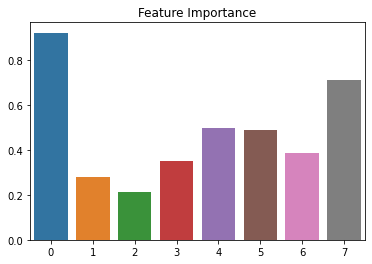


**************************************************



In [6]:
breaker()
model = train(LogisticRegression(random_state=SEED), "lgr", X, y, LOG_FILE)
get_feature_importance(model.coef_[0], "lgr")

### **Decision Tree Classifier**


**************************************************

Accuracy  : 0.89300
ROC-AUC   : 0.88122
Precision : [0.9285005  0.82048682]
Recall    : [0.913532   0.84889822]
F-Score   : [0.92095543 0.83445075]

**************************************************

Accuracy  : 0.89400
ROC-AUC   : 0.88385
Precision : [0.92185904 0.84165067]
Recall    : [0.91624365 0.85145631]
F-Score   : [0.91904277 0.8465251 ]

**************************************************

Accuracy  : 0.90233
ROC-AUC   : 0.88650
Precision : [0.92122107 0.8627451 ]
Recall    : [0.93363273 0.83935743]
F-Score   : [0.92738538 0.85089059]

**************************************************

Accuracy  : 0.90467
ROC-AUC   : 0.89200
Precision : [0.92427282 0.86580517]
Recall    : [0.93174924 0.85225049]
F-Score   : [0.92799597 0.85897436]

**************************************************

Accuracy  : 0.91500
ROC-AUC   : 0.90463
Precision : [0.93759361 0.86960883]
Recall    : [0.93525896 0.87399194]
F-Score   : [0.93642483 0.87179

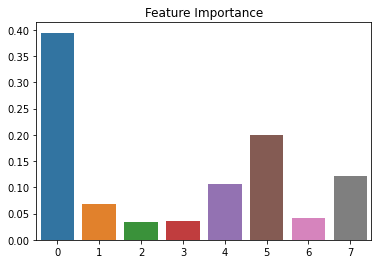


**************************************************



In [7]:
breaker()
model = train(DecisionTreeClassifier(random_state=SEED), "dtc", X, y, LOG_FILE)
get_feature_importance(model.feature_importances_, "dtc")

### **Extra Tree Classifier**


**************************************************

Accuracy  : 0.83067
ROC-AUC   : 0.80971
Precision : [0.88430983 0.72109533]
Recall    : [0.86624514 0.75317797]
F-Score   : [0.87518428 0.73678756]

**************************************************

Accuracy  : 0.84833
ROC-AUC   : 0.83263
Precision : [0.88304392 0.7831094 ]
Recall    : [0.88439898 0.78086124]
F-Score   : [0.88372093 0.78198371]

**************************************************

Accuracy  : 0.84500
ROC-AUC   : 0.82181
Precision : [0.87838503 0.7750258 ]
Recall    : [0.89110889 0.75250501]
F-Score   : [0.88470121 0.76359939]

**************************************************

Accuracy  : 0.85200
ROC-AUC   : 0.83490
Precision : [0.89368104 0.7693837 ]
Recall    : [0.88480636 0.78498986]
F-Score   : [0.88922156 0.77710843]

**************************************************

Accuracy  : 0.85033
ROC-AUC   : 0.83109
Precision : [0.88617074 0.77833501]
Recall    : [0.88927856 0.77290837]
F-Score   : [0.88772193 0.77561

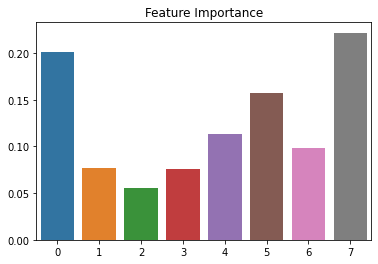


**************************************************



In [8]:
breaker()
model = train(ExtraTreeClassifier(random_state=SEED), "etc", X, y, LOG_FILE)
get_feature_importance(model.feature_importances_, "etc")

### **AdaBoost Classifier**


**************************************************

Accuracy  : 0.94167
ROC-AUC   : 0.93581
Precision : [0.9612711  0.90162272]
Recall    : [0.95228726 0.91933816]
F-Score   : [0.95675809 0.91039427]

**************************************************

Accuracy  : 0.95100
ROC-AUC   : 0.94587
Precision : [0.96220633 0.92994242]
Recall    : [0.96269801 0.92905081]
F-Score   : [0.96245211 0.9294964 ]

**************************************************

Accuracy  : 0.94900
ROC-AUC   : 0.94001
Precision : [0.9581487  0.92982456]
Recall    : [0.96623635 0.9137931 ]
F-Score   : [0.96217553 0.92173913]

**************************************************

Accuracy  : 0.95067
ROC-AUC   : 0.94525
Precision : [0.96439318 0.92345924]
Recall    : [0.9615 0.929 ]
F-Score   : [0.96294442 0.92622134]

**************************************************

Accuracy  : 0.95333
ROC-AUC   : 0.95137
Precision : [0.97403894 0.91173521]
Recall    : [0.95684159 0.9458897 ]
F-Score   : [0.96536368 0.92849847]

**

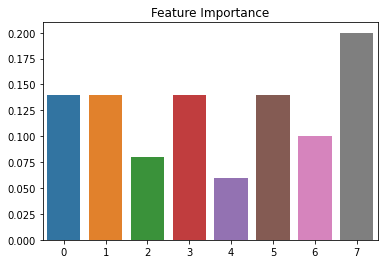


**************************************************



In [9]:
breaker()
model = train(AdaBoostClassifier(random_state=SEED), "abc", X, y, LOG_FILE)
get_feature_importance(model.feature_importances_, "abc")

### **ExtraTreesClassifer**


**************************************************

Accuracy  : 0.93500
ROC-AUC   : 0.93010
Precision : [0.96077458 0.88235294]
Recall    : [0.94344222 0.91675448]
F-Score   : [0.95202952 0.89922481]

**************************************************

Accuracy  : 0.94100
ROC-AUC   : 0.93624
Precision : [0.95863126 0.90786948]
Recall    : [0.95134313 0.9211295 ]
F-Score   : [0.95497329 0.91445143]

**************************************************

Accuracy  : 0.93600
ROC-AUC   : 0.92683
Precision : [0.95273264 0.90092879]
Recall    : [0.95273264 0.90092879]
F-Score   : [0.95273264 0.90092879]

**************************************************

Accuracy  : 0.93767
ROC-AUC   : 0.93267
Precision : [0.95987964 0.89363817]
Recall    : [0.94705591 0.91828396]
F-Score   : [0.95342466 0.90579345]

**************************************************

Accuracy  : 0.94533
ROC-AUC   : 0.94264
Precision : [0.96904643 0.89769308]
Recall    : [0.95007342 0.93521421]
F-Score   : [0.95946614 0.91606

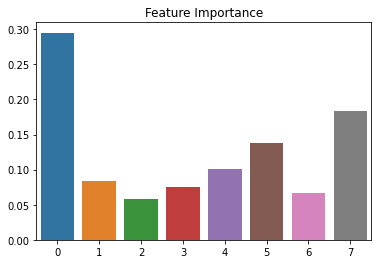


**************************************************



In [10]:
breaker()
model = train(ExtraTreesClassifier(random_state=SEED), "etcs", X, y, LOG_FILE)
get_feature_importance(model.feature_importances_, "etcs")

### **Gradient Boosting Classifier**


**************************************************

Accuracy  : 0.94467
ROC-AUC   : 0.94069
Precision : [0.96673287 0.89959432]
Recall    : [0.9516129  0.92976939]
F-Score   : [0.9591133  0.91443299]

**************************************************

Accuracy  : 0.95300
ROC-AUC   : 0.94844
Precision : [0.96475996 0.93090211]
Recall    : [0.96328404 0.93358999]
F-Score   : [0.96402143 0.93224411]

**************************************************

Accuracy  : 0.94533
ROC-AUC   : 0.93710
Precision : [0.95864106 0.91744066]
Recall    : [0.96053281 0.91366906]
F-Score   : [0.959586   0.91555098]

**************************************************

Accuracy  : 0.95167
ROC-AUC   : 0.94793
Precision : [0.96890672 0.91749503]
Recall    : [0.95880893 0.93705584]
F-Score   : [0.96383138 0.92717228]

**************************************************

Accuracy  : 0.95500
ROC-AUC   : 0.95316
Precision : [0.97503744 0.91474423]
Recall    : [0.95829244 0.94802495]
F-Score   : [0.96659243 0.93108

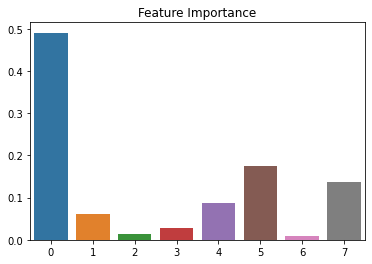


**************************************************



In [11]:
breaker()
model = train(GradientBoostingClassifier(random_state=SEED), "gbc", X, y, LOG_FILE)
get_feature_importance(model.feature_importances_, "gbc")

### **Random Forest Classifier**


**************************************************

Accuracy  : 0.93133
ROC-AUC   : 0.92733
Precision : [0.9612711  0.87018256]
Recall    : [0.9379845  0.91666667]
F-Score   : [0.94948504 0.89281998]

**************************************************

Accuracy  : 0.94033
ROC-AUC   : 0.93624
Precision : [0.96016343 0.90307102]
Recall    : [0.94901565 0.92345437]
F-Score   : [0.95455699 0.91314896]

**************************************************

Accuracy  : 0.93667
ROC-AUC   : 0.92899
Precision : [0.95667159 0.89473684]
Recall    : [0.95012225 0.9078534 ]
F-Score   : [0.95338567 0.9012474 ]

**************************************************

Accuracy  : 0.94100
ROC-AUC   : 0.93689
Precision : [0.96339017 0.89662028]
Recall    : [0.94864198 0.92512821]
F-Score   : [0.95595919 0.91065119]

**************************************************

Accuracy  : 0.94567
ROC-AUC   : 0.94315
Precision : [0.96954568 0.89769308]
Recall    : [0.95009785 0.93619247]
F-Score   : [0.95972325 0.91653

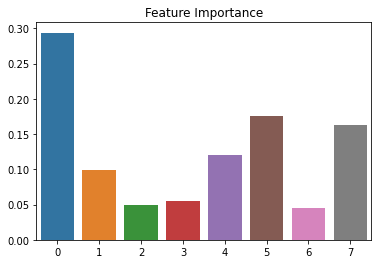


**************************************************



In [12]:
breaker()
model = train(RandomForestClassifier(random_state=SEED), "rfc", X, y, LOG_FILE)
get_feature_importance(model.feature_importances_, "rfc")

### **XGB Classifier**


**************************************************

Accuracy  : 0.94667
ROC-AUC   : 0.94121
Precision : [0.96425025 0.91075051]
Recall    : [0.95665025 0.9257732 ]
F-Score   : [0.96043521 0.91820041]

**************************************************

Accuracy  : 0.95000
ROC-AUC   : 0.94521
Precision : [0.96271706 0.92610365]
Recall    : [0.96075433 0.92967245]
F-Score   : [0.96173469 0.92788462]

**************************************************

Accuracy  : 0.94733
ROC-AUC   : 0.93767
Precision : [0.95568685 0.92982456]
Recall    : [0.96615231 0.90918264]
F-Score   : [0.96089109 0.91938776]

**************************************************

Accuracy  : 0.95133
ROC-AUC   : 0.94561
Precision : [0.96389168 0.92644135]
Recall    : [0.96292585 0.92828685]
F-Score   : [0.96340852 0.92736318]

**************************************************

Accuracy  : 0.95433
ROC-AUC   : 0.95168
Precision : [0.97304044 0.91675025]
Recall    : [0.95915354 0.94421488]
F-Score   : [0.96604709 0.93027

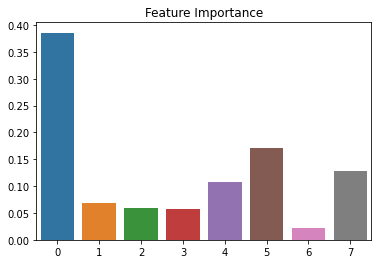


**************************************************



In [13]:
breaker()
model = train(XGBClassifier(random_state=SEED), "xgbc", X, y, LOG_FILE)
get_feature_importance(model.feature_importances_, "xgbc")